In [63]:
import numpy as np
from scipy.signal import argrelextrema
import pandas as pd


In [11]:
df = pd.read_csv ('bitcoin.csv')

#df.set_index('Date', inplace=True)

#df.index = pd.to_datetime(df.index)

df = df.drop('Volume', axis=1)

#df = df.rename (columns= {'Adj Close' : 'close' }) 

df_precios = pd.DataFrame (df ['Adj Close']).rename(columns={'Adj Close': 'close'})

df

,Date,Adj Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3479,2024-03-27,69455.343750
3480,2024-03-28,70744.953125
3481,2024-03-29,69892.828125
3482,2024-03-30,69645.304688


In [70]:
def get_max_min(prices, smoothing, window_range):
    """
    Función para identificar los máximos y mínimos locales en los precios y retornar una serie con los valores máximos y mínimos.

    Args:
    - prices (DataFrame): DataFrame que contiene los precios de cierre.
    - smoothing (int): Número de períodos para suavizar los precios antes de identificar los máximos y mínimos locales.
    - window_range (int): Ventana de tiempo alrededor de los máximos y mínimos locales para buscar los precios máximos y mínimos.

    Returns:
    - max_min (Series): Serie que contiene los valores máximos y mínimos locales indexados por el número de día.
    """

    # Suavizar los precios de cierre utilizando un promedio móvil
    smooth_prices = prices['Adj Close'].rolling(window=smoothing).mean().dropna()

    # Encontrar los índices de los máximos y mínimos locales
    local_max = argrelextrema(smooth_prices.values, np.greater)[0]
    local_min = argrelextrema(smooth_prices.values, np.less)[0]

    price_local_max_dt = []
    price_local_min_dt = []
    
    # Obtener las fechas de los precios máximos locales
    for i in local_max:
        if (i > window_range) and (i < len(prices) - window_range):
            price_local_max_dt.append(prices.iloc[i-window_range:i+window_range]['Adj Close'].idxmax())
    
    # Obtener las fechas de los precios mínimos locales
    for i in local_min:
        if (i > window_range) and (i < len(prices) - window_range):
            price_local_min_dt.append(prices.iloc[i-window_range:i+window_range]['Adj Close'].idxmin())  
    
    # Crear DataFrames con los precios máximos y mínimos locales
    maxima = pd.DataFrame(prices.loc[price_local_max_dt])
    minima = pd.DataFrame(prices.loc[price_local_min_dt])
    
    # Concatenar los DataFrames y ordenar por índice
    max_min = pd.concat([maxima, minima]).sort_index()
    max_min.index.name = 'date'
    max_min = max_min.reset_index()
    
    # Eliminar duplicados en la columna de fechas
    max_min = max_min[~max_min.date.duplicated()]
    
    # Obtener los índices numéricos de los días correspondientes a los máximos y mínimos locales
    p = prices.reset_index()
    max_min['day_num'] = p[p['Date'].isin(max_min.date)].index.values
    
    # Establecer el índice como los números de día y seleccionar los precios de cierre
    max_min = max_min.set_index('day_num')['Adj Close']
    
    return max_min

# Parámetros de suavizado y ventana para identificar máximos y mínimos locales
smoothing = 3
window = 10

# Obtener la serie de máximos y mínimos locales
minmax = get_max_min(df, smoothing, window)

# Mostrar la serie de máximos y mínimos locales
minmax


ValueError: Length of values (0) does not match length of index (593)

In [12]:
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo con datos de precios
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', periods=10, freq='D')
prices = pd.DataFrame({
    'date': dates,
    'close': np.random.randint(50, 150, size=10)
})

# Definir el tamaño de la ventana de suavizado
smoothing = 5

# Calcular la serie suavizada de precios de cierre utilizando media móvil
smooth_prices = prices['close'].rolling(window=smoothing).mean().dropna()

# Imprimir los primeros y últimos valores para comparación



In [ ]:
print("Precios originales:")
print(prices.head())


Precios originales:
        date  close
0 2022-01-01     94
1 2022-01-02     97
2 2022-01-03    114
3 2022-01-04    117
4 2022-01-05    117


In [ ]:
print("\nPrecios suavizados:")
print(smooth_prices.head())


Precios suavizados:
4    107.8
5    100.8
6    108.0
7     99.4
8     93.2
Name: close, dtype: float64


### Uso de ventana móvil y el cálculo de la media móvil sobre los precios de cierre:

## Ventana movil:

> Ventana de tiempo que se desplaza a lo largo de la serie de datos. Se utiliza para calcular estadísticas sobre los puntos de datos dentro de esa ventana.

## Media movil:

> Técnica para suavizar una serie de datos al calcular el promedio de los valores dentro de una ventana móvil en cada punto de la serie. Tener una vision mas clara de la tendencia eliminando fluctuaciones 

# Ejemplo:

Venta (5): Tenemos una serie de precios de cierre diarios para un activo durante 7 días.

Queremos suavizar esta serie aplicando una media movil con una ventana de tamaño 5

Serie de precios: 

Día 1: 100
Día 2: 110
Día 3: 105
Día 4: 115
Día 5: 120
Día 6: 108
Día 7: 112

Cálculo de la Media Móvil (Ventana de Tamaño 5):

Para calcular la media móvil con una ventana de tamaño 5, seguimos estos pasos:

#### Los DATOS NO ESTAN CORRECTOS DEL TODO

Día 1: No hay suficientes datos para calcular la media móvil (primera ventana incompleta).

Día 2: Media móvil de los últimos 5 días (Día 1 a Día 5): (100 + 110 + 105 + 115 + 120) / 5 = 110

Día 3: Media móvil de los últimos 5 días (Día 2 a Día 6): (110 + 105 + 115 + 120 + 108) / 5 = 111.6

Día 4: Media móvil de los últimos 5 días (Día 3 a Día 7): (105 + 115 + 120 + 108 + 112) / 5 = 112

Día 5: Media móvil de los últimos 5 días (Día 4 a Día 7): (115 + 120 + 108 + 112) / 5 = 113

Dia 6, utilizamos los precios de cierre desde el día 2 hasta el día 6 (5 días en total) para calcular la media móvil.

Día 7: Media móvil de los últimos 5 días (Día 3 a Día 7): (108 + 112) / 2 = 110




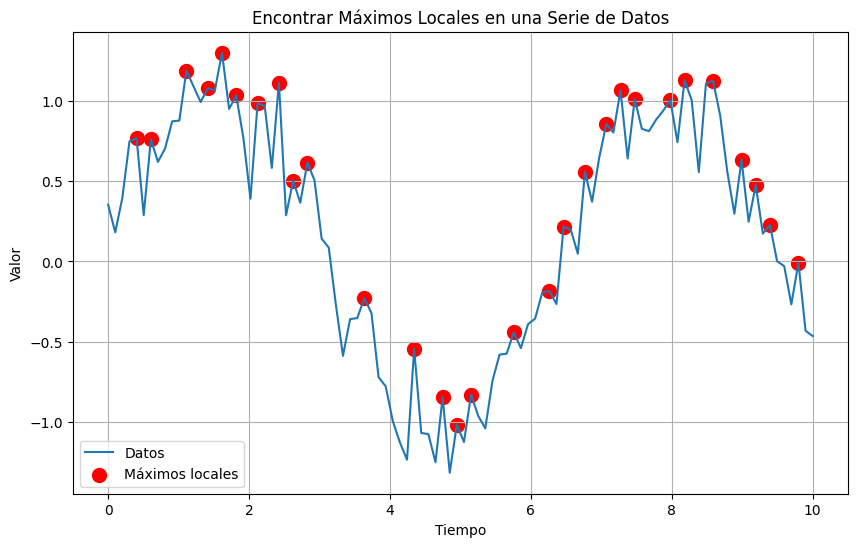

In [13]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Generar datos sintéticos (serie senoidal con ruido)
np.random.seed(0)
t = np.linspace(0, 10, 100)
data = np.sin(t) + 0.2 * np.random.randn(100)

# Encontrar índices de máximos locales
local_max_indices = signal.argrelextrema(data, np.greater)[0]

# Graficar los datos y marcar los máximos locales
plt.figure(figsize=(10, 6))
plt.plot(t, data, label='Datos')
plt.scatter(t[local_max_indices], data[local_max_indices], color='red', label='Máximos locales', s=100, marker='o')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Encontrar Máximos Locales en una Serie de Datos')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
df = df.tail (50)

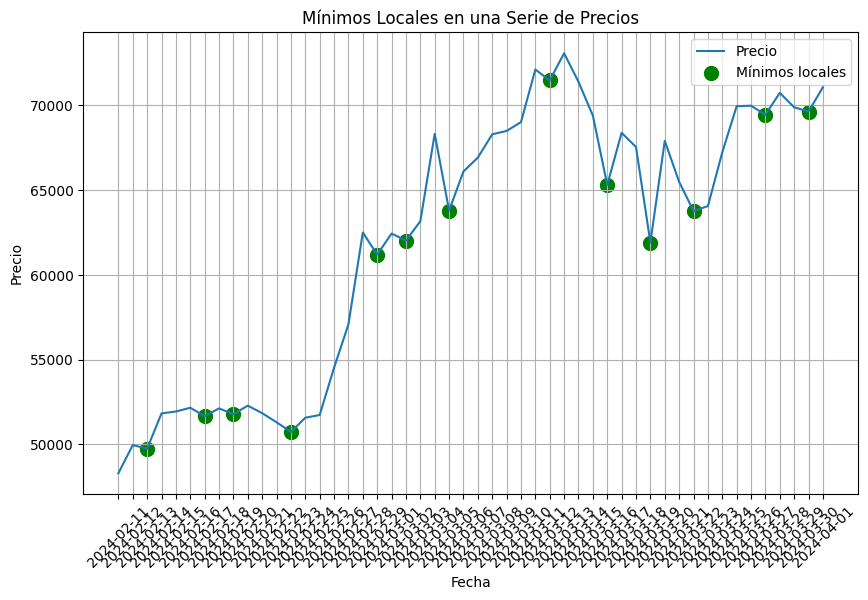

In [18]:
local_min_indices = signal.argrelextrema(df['Adj Close'].values, np.less)[0]

# Graficar los datos y marcar los mínimos locales encontrados
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Adj Close'], label='Precio')
plt.scatter(df.iloc[local_min_indices]['Date'], df.iloc[local_min_indices]['Adj Close'],
            color='green', label='Mínimos locales', s=100, marker='o')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Mínimos Locales en una Serie de Precios')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [21]:

filas_seleccionadas = df.iloc[local_min_indices]

filas_seleccionadas

,Date,Adj Close
3436,2024-02-13,49742.441406
3440,2024-02-17,51662.996094
3442,2024-02-19,51779.144531
3446,2024-02-23,50731.949219
3452,2024-02-29,61198.382812
3454,2024-03-02,62029.847656
3457,2024-03-05,63801.199219
3464,2024-03-12,71481.289062
3468,2024-03-16,65315.117188
3471,2024-03-19,61912.773438


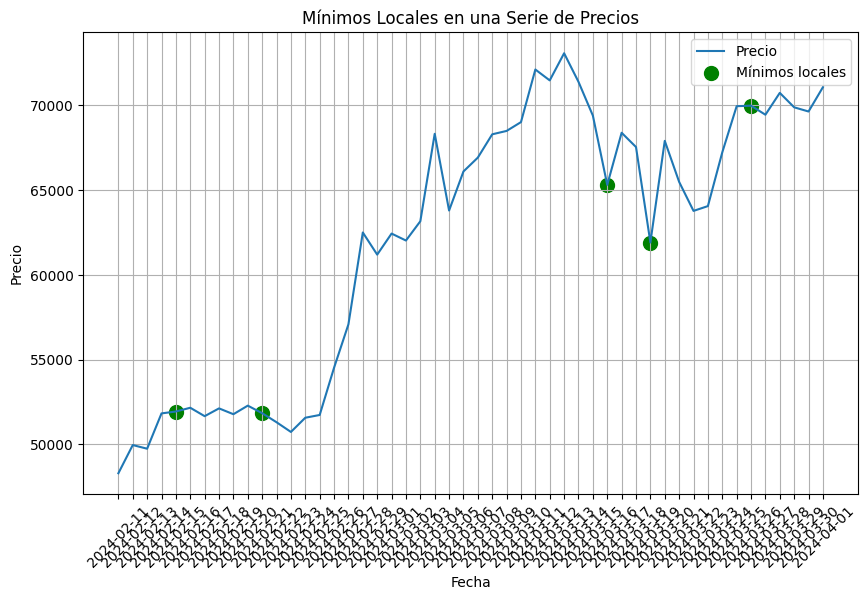

In [16]:
smooth_prices = df['Adj Close'].rolling(window=smoothing).mean().dropna()


#local_max = argrelextrema(smooth_prices.values, np.greater)[0]
local_min_indices = signal.argrelextrema(smooth_prices.values, np.less)[0]

# Graficar los datos y marcar los mínimos locales encontrados
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Adj Close'], label='Precio')
plt.scatter(df.iloc[local_min_indices]['Date'], df.iloc[local_min_indices]['Adj Close'],
            color='green', label='Mínimos locales', s=100, marker='o')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Mínimos Locales en una Serie de Precios')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()